<a href="https://colab.research.google.com/github/alam740/Data-Analytics-Course/blob/master/Anova_HW_%5BEmpty%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np


In [ ]:
#@title Summary Function
def Summary(df):

  groups = list(df)

  count = []
  summ = []
  avg = []
  vari = []

  for index in groups:

    count.append(np.size(df[index]))
    summ.append(np.sum(df[index]))
    avg.append(np.average(df[index]))
    vari.append(np.var(df[index]))

  summary = {"Groups":groups,
             "Count":count,
             "Sum":summ,
             "Average":avg,
             "Variance":vari}

  summary = pd.DataFrame(summary)

  return summary


In [ ]:
## Below is the procedure for setting up the data in the proper format

## To create a Pandas df, first you create a dictionary
## Dictionary keys will be the column name
## Dictionary items will be the data points ...

d = {'The News': [23, 34, 65, 76, 85, 34, 23, 56, 78, 92],
      'The Big Bang Theory': [27, 54, 96, 52, 47, 86, 43, 19, 79, 57],
      'The Simpsons': [56, 46, 25, 41, 76, 43, 27, 29, 46, 96]}
      
df = pd.DataFrame(data=d)

# reshape the d dataframe suitable for statsmodels package
# Columns now have the following order:
    ## Index | Show Watched | Exam Score
# or more generally
    ## Index | Indp. Variable | Dept. Variable

# New orginization of df allows packages to work properlly

df_melt = pd.melt(df.reset_index(), id_vars=['index'], 
                  value_vars=['The News', 
                              'The Big Bang Theory', 
                              'The Simpsons'])
# replace column names
df_melt.columns = ['index', 'Show_Watched', 'Exam_Score']


## I've made a summary function to display relevant statistics
## Code can be viewed above

summary = Summary(df)
print('Raw DataFram\n\n',df,
      '\n\nSummary Statistics\n\n',summary,
      '\n\nMelted Dataframe\n\n',df_melt)

Raw DataFram

    The News  The Big Bang Theory  The Simpsons
0        23                   27            56
1        34                   54            46
2        65                   96            25
3        76                   52            41
4        85                   47            76
5        34                   86            43
6        23                   43            27
7        56                   19            29
8        78                   79            46
9        92                   57            96 

Summary Statistics

                 Groups  Count  Sum  Average  Variance
0             The News     10  566     56.6    624.44
1  The Big Bang Theory     10  560     56.0    551.00
2         The Simpsons     10  485     48.5    456.25 

Melted Dataframe

     index         Show_Watched  Exam_Score
0       0             The News          23
1       1             The News          34
2       2             The News          65
3       3             The News      

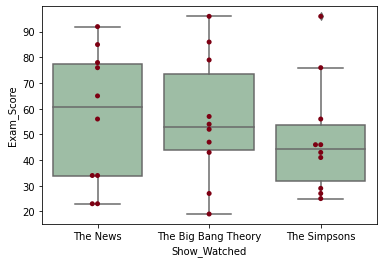

In [ ]:
## The original code from which this was adopted from showed a boxplot and swarm plot
## Both might be usefull to visualize the data and gain some intuition.

ax = sns.boxplot(x='Show_Watched', y='Exam_Score', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x='Show_Watched', y='Exam_Score', data=df_melt, color='#7d0013')
plt.show()

In [ ]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

fvalue, pvalue = stats.f_oneway(df['The News'], 
                                df['The Big Bang Theory'], 
                                df['The Simpsons'])

## The arguments passed into the ols model was the most confusing for me
## So I will try to make it clear what is beind done.
## Generally the string passed into ols will have the form
## 'dependent variable name ~ C(independent variable name)'

## NOTE the amount of spaces in this string is critical
## i.e the string should have the depnd. variable writen with NO SPACES
## then,
## space ~ space
## then,
## C(indp. variable) with NO SPACES
## that is why I choose the variable names Exam_Score and Show_Watched.
## If i used Exam Score and Show Watched instead, the string would not be correct
## following this same format closely should ensure your other datasets work

model = ols('Exam_Score ~ C(Show_Watched)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

## Here I will show what the table looks like before renaming the indicies

print(anova_table,'\n\n')

## By default, Between groups is labeled C(indp. Variable)
## and within groups is named Residual
## Just so this table is consistent with excel i've renamed them
## for future datasets you must change C(show_watched) to the correct indept.
## variable of your dataset...

anova_table = anova_table.rename(index={'C(Show_Watched)': 'Between Groups',
                                        'Residual': 'Within Groups'})


## Then we add the totals for MS and DF
## This part of the code should not need to be changed 

MS = anova_table['sum_sq']/anova_table["df"]
anova_table.insert(2, "mean_sq", MS)

anova_table.loc['Total'] = [np.sum(anova_table['sum_sq']),
                       np.sum(anova_table["df"]),
                       'NaN','NaN','NaN']  # adding a row

## Now the final table

anova_table


                  sum_sq    df         F    PR(>F)
C(Show_Watched)    407.4   2.0  0.337068  0.716821
Residual         16316.9  27.0       NaN       NaN 




,sum_sq,df,mean_sq,F,PR(>F)
Between Groups,407.4,2.0,203.7,0.337068,0.716821
Within Groups,16316.9,27.0,604.32963,NaN,NaN
Total,16724.3,29.0,NaN,NaN,NaN


Code Adapted from [here](https://www.pythonfordatascience.org/anova-python/)

In [ ]:
## Excersise 2

d = {'5 mg':  [7, 8, 15, 11, 9, 10],
     '10 mg': [12, 17, 13, 18, 19, 15],
     '15 mg': [14, 18, 19, 17, 16, 18],
     '20 mg': [19, 25, 22, 23, 18, 20]}

df = pd.DataFrame(data=d)
df_melt = pd.melt(df.reset_index(), id_vars=['index'], 
                  value_vars=['5 mg', '10 mg', '15 mg', '20 mg'])
df_melt.columns = ['index', 'Drug_mg', 'patient_score']

## Preform One-Way ANOVA below:


In [ ]:
## Excersise 3

d = {'Hyper Growth':  [42, 96, 81, 95, 76],
    'Max Factor':  [112, 96, 88, 135, 119],
    'Top Notch':  [70, 17, 49, 24, 40],}

df = pd.DataFrame(data=d)

df_melt = pd.melt(df.reset_index(), id_vars=['index'], 
                  value_vars=['Hyper Growth', 'Max Factor', 'Top Notch'])

df_melt.columns = ['index', 'fertilizer', 'effectiveness']

## Preform One-Way ANOVA below:
